# Decision Tree Classifiers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     
%matplotlib inline
%conda install graphviz
%conda install python-graphviz 

C:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Purity Measures
# We need to find a quantity that is minimised when the two classes are equally separated

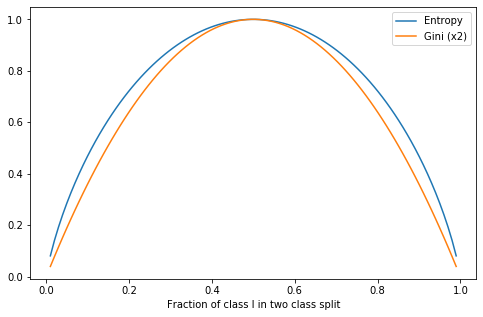

In [4]:
r = np.linspace(0.01,0.99,100)
e = -r*np.log2(r)-(1-r)*np.log2(1-r)
g = 2.0*((1-r*r)-(1-r)**2)

plt.figure(figsize=(8,5))
plt.plot(r,e,label = 'Entropy')
plt.plot(r,g,label = 'Gini (x2)')
plt.xlabel('Fraction of class I in two class split')
plt.legend()

## Visualisation

In [5]:
m = 250 
np.random.seed(10)


In [7]:
X = np.random.rand(m,2)
X

array([[0.02965494, 0.01142853],
       [0.331844  , 0.06143108],
       [0.59817351, 0.88592025],
       [0.41213378, 0.0382722 ],
       [0.0808424 , 0.08191454],
       [0.80936733, 0.800694  ],
       [0.01690981, 0.86129433],
       [0.91130022, 0.40087668],
       [0.2868907 , 0.84304489],
       [0.61704455, 0.14059873],
       [0.22875561, 0.84149797],
       [0.84435847, 0.22014599],
       [0.81113764, 0.53595353],
       [0.61042845, 0.52386988],
       [0.63962915, 0.00515635],
       [0.02473878, 0.69002639],
       [0.17159302, 0.69393067],
       [0.28526562, 0.05510592],
       [0.5822229 , 0.29581873],
       [0.32281614, 0.96698939],
       [0.19493466, 0.34739651],
       [0.10401407, 0.40178185],
       [0.09284765, 0.50484381],
       [0.74259074, 0.00529051],
       [0.09016117, 0.05618398],
       [0.88432566, 0.98558586],
       [0.52017469, 0.19841743],
       [0.93334832, 0.6545982 ],
       [0.79179175, 0.51121568],
       [0.78821189, 0.33479673],
       [0.

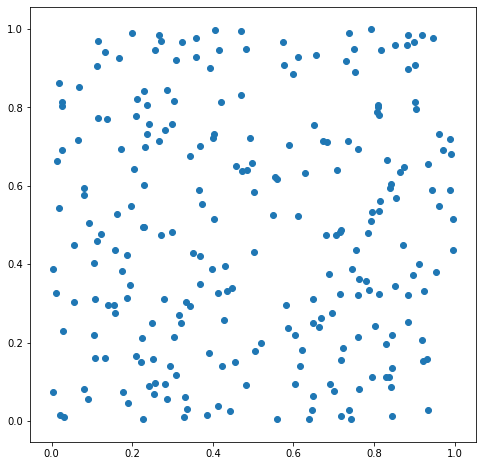

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1])

In [11]:
y = []
for i in range(0,int(m)):
    xx = X[i,0]
    yy = X[i,1]
    c = 0

    if xx < 0.5 and yy < 0.3:
        c = 1
    if xx > 0.5 and yy > 0.5 and yy < 0.8:
        c = 1
    if xx > 0.5 and xx <0.7 and yy > 0.8:
        c = 1 
    y.append(c) 

Text(0, 0.5, 'Y')

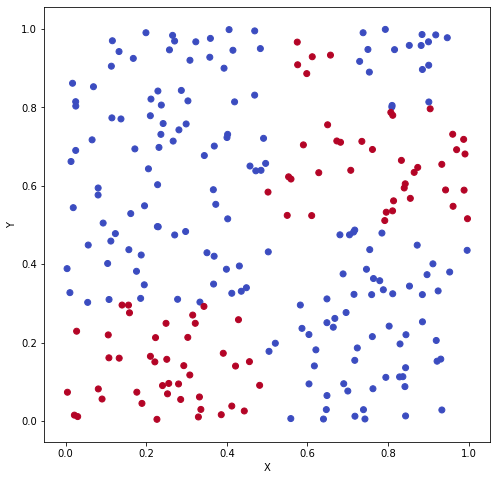

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.coolwarm)
plt.xlabel('X')
plt.ylabel('Y')

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from os import system
from graphviz import Source

In [15]:
clf = DecisionTreeClassifier(max_depth=10) #gini defaulted as criteria
clf = clf.fit(X,y)

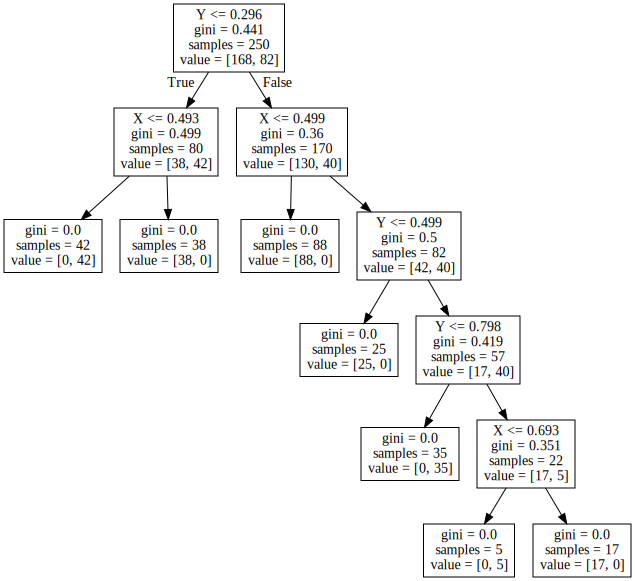

In [16]:
from IPython.display import SVG
graph = Source(export_graphviz(clf,out_file=None,feature_names=['X','Y']))
SVG(graph.pipe(format='svg'))

In [17]:
#plot function from HelpfulFunctions module
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])
def featureSpacePlot(Xname,Yname,data,y,classifier,plt,titleName=""):
    
    h = .01  # step size in the mesh
    X = data[Xname]
    Y = data[Yname]
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.min() - .05, X.max() + .05
    y_min, y_max = Y.min() - .05, Y.max() + .05
    nx = int((x_max - x_min)/ h)
    ny = int((y_max - y_min)/ h)
    g1 = np.linspace(x_min, x_max, nx)
    g2 = np.linspace(y_min, y_max, ny)
    xx, yy = np.meshgrid(g1,g2)
    #xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    # Plot also the training points
    plt.scatter(X,Y, c=y, edgecolors='k', cmap=cmap_bold, alpha = 1.0)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_bold, alpha=0.1, shading='auto')
    plt.xlabel(Xname)
    plt.ylabel(Yname)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titleName, fontsize=16)
    return plt

<module 'matplotlib.pyplot' from 'C:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

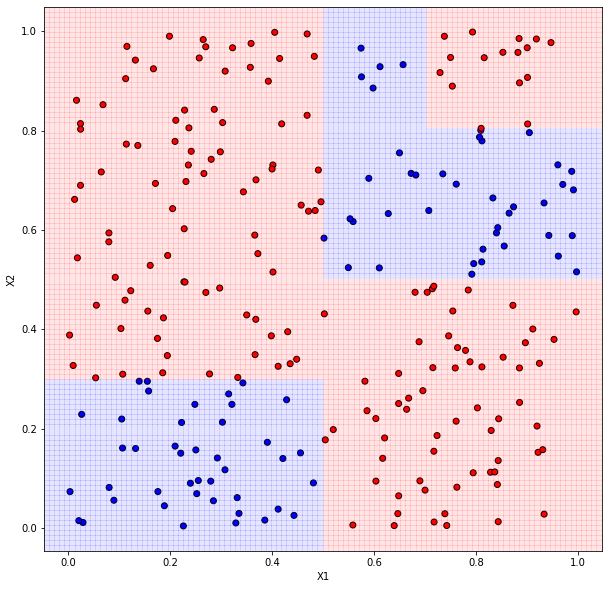

In [19]:
df = pd.DataFrame(X)
df.columns = ['X1','X2']
plt.figure(figsize=(10,10))
featureSpacePlot('X1','X2',df,y,clf,plt)

## Using Decision Tree on iris dataset

In [20]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [21]:
from sklearn.datasets import load_iris

In [22]:
iris = load_iris()
x = pd.DataFrame(iris.data)
y = iris.target
x.columns = ['sepalLength','sepalWidth','petalLength','petalWidth']
x.head()

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
x.shape

(150, 4)

In [25]:
# use 3 tree features to predict virginica
x_3 = x[['petalLength','petalWidth','sepalLength']]

In [26]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
clf = DecisionTreeClassifier(random_state=235,max_depth=7)
clf = clf.fit(x_3,y)

In [28]:
y_pred3 = clf.predict(x_3)

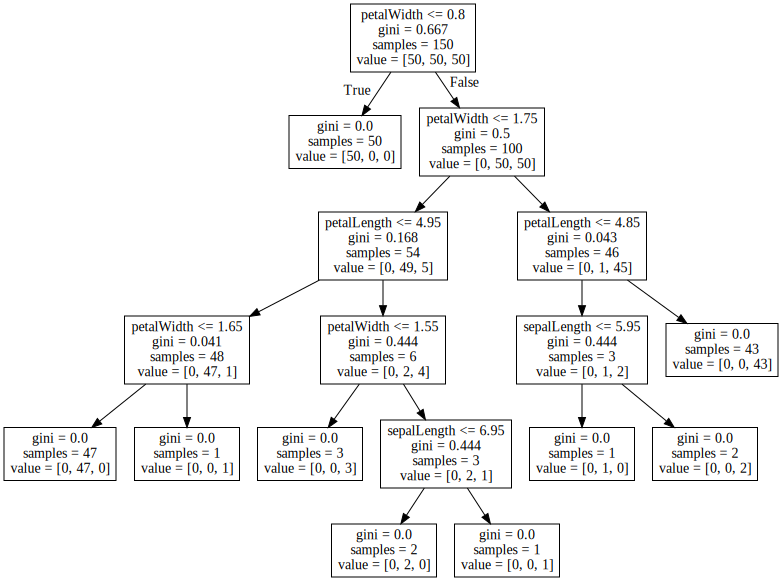

In [29]:
graph = Source(export_graphviz(clf, out_file=None, feature_names = x_3.columns))
SVG(graph.pipe(format='svg'))

In [30]:
confusion_matrix(y,y_pred3)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [31]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib as mpl
def plot_cm(clf, X, y, display_labels):
    mpl.rcParams.update({'font.size': 16})
    plot_confusion_matrix(clf, X, y, display_labels=display_labels,cmap=mpl.cm.Blues)

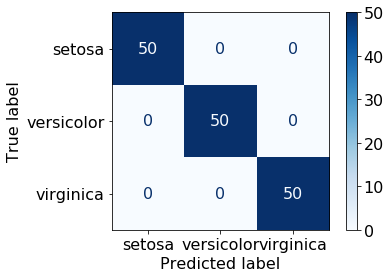

In [32]:
plot_cm(clf,x_3,y,display_labels=['setosa','versicolor','virginica'])

## Use 2 features to predict virginica

In [33]:
x_2 = x[['sepalLength','sepalWidth']]

In [34]:
y_2 = (np.array(y)==2).astype(np.int)

In [35]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_2,y_2)

In [36]:

y_pred2 = clf.predict(x_2)

In [37]:
confusion_matrix(y_2,y_pred2)

array([[99,  1],
       [10, 40]], dtype=int64)

In [38]:
print(classification_report(y_2,y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       100
           1       0.98      0.80      0.88        50

    accuracy                           0.93       150
   macro avg       0.94      0.90      0.91       150
weighted avg       0.93      0.93      0.92       150



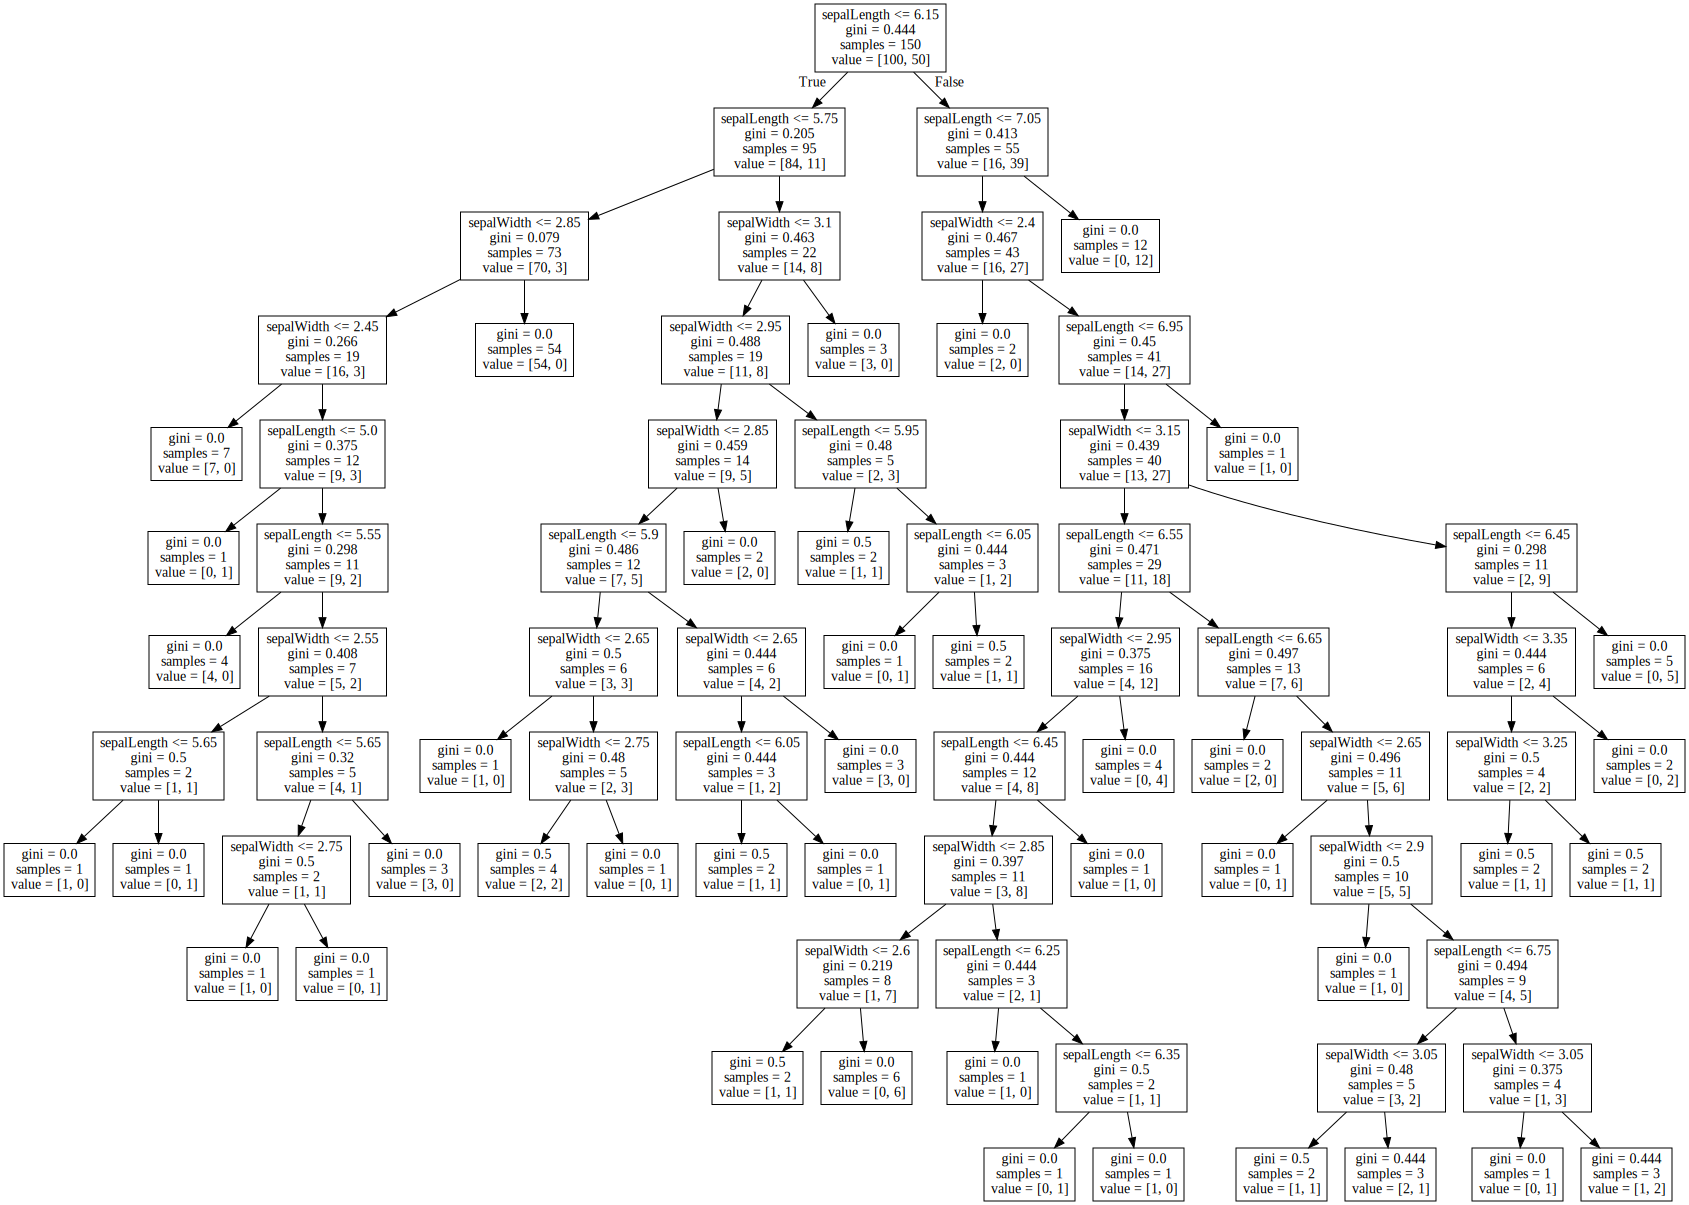

In [39]:
graph = Source(export_graphviz(clf, out_file=None, feature_names = x_2.columns))
SVG(graph.pipe(format='svg'))

In [40]:
x_2['y_2'] = y_2
x_2 = x_2.sort_values(['sepalLength','sepalWidth'])

C:\Users\YUAN PUEN\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
x_2[80:100]

,sepalLength,sepalWidth,y_2
61,5.9,3.0,0
149,5.9,3.0,1
70,5.9,3.2,0
62,6.0,2.2,0
119,6.0,2.2,1
83,6.0,2.7,0
78,6.0,2.9,0
138,6.0,3.0,1
85,6.0,3.4,0
134,6.1,2.6,1


## Multiclass Classification Decision Boundary

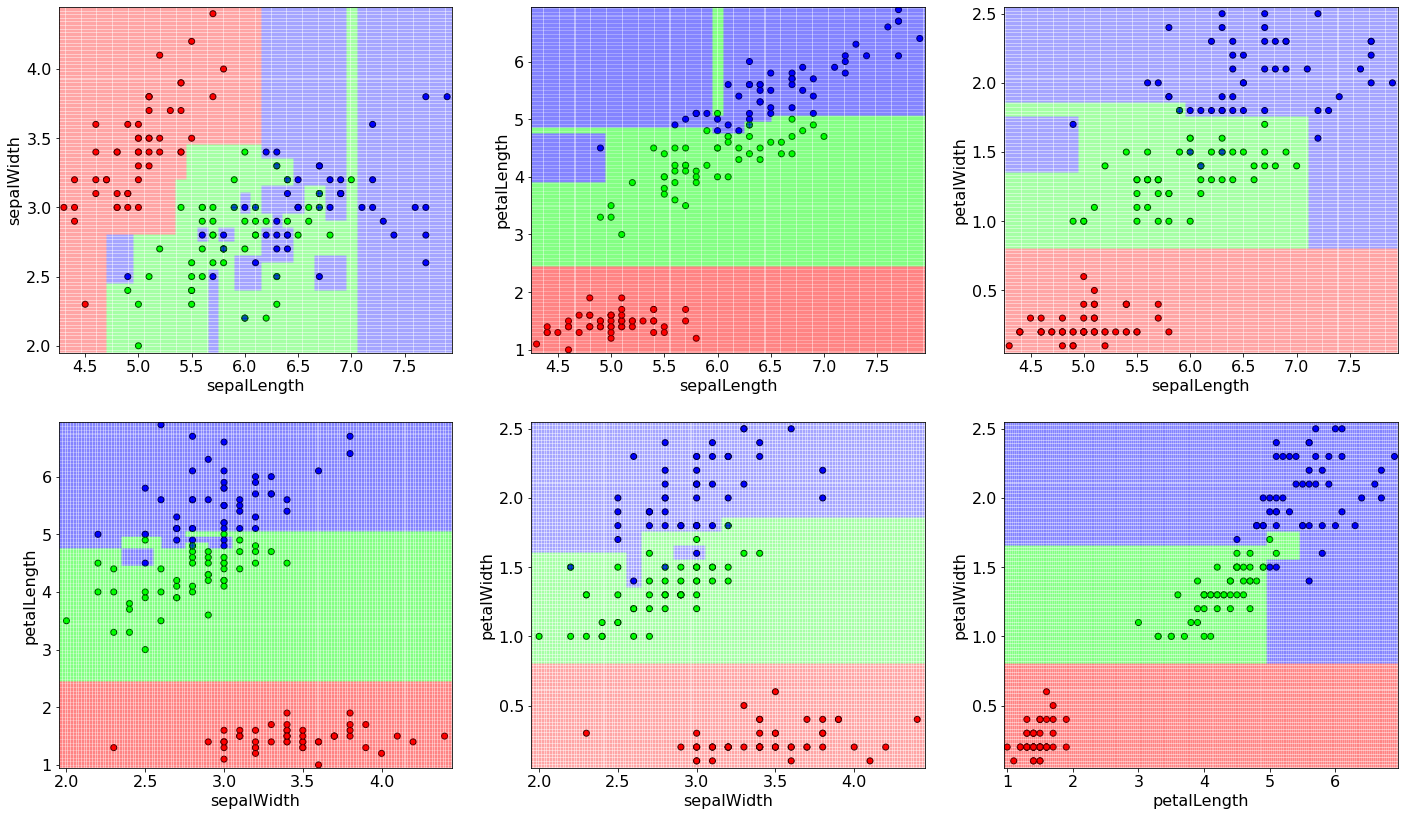

In [42]:
plt.figure(figsize=(24,14))

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]):
    featureX = x.columns[pair[0]]
    featureY = x.columns[pair[1]]

    X_2 = x[[featureX,featureY]]
    clf = DecisionTreeClassifier()
    clf.fit(X_2,y)

    plt.subplot(2,3,pairidx + 1)
    featureSpacePlot(featureX,featureY,x,y,clf,plt)